In [19]:
"""Show the results of the optimization on the VLSE benchmark."""

# Copyright (C) 2024 National Renewable Energy Laboratory

# This program is free software: you can redistribute it and/or modify
# it under the terms of the GNU General Public License as published by
# the Free Software Foundation, either version 3 of the License, or
# (at your option) any later version.

# This program is distributed in the hope that it will be useful,
# but WITHOUT ANY WARRANTY; without even the implied warranty of
# MERCHANTABILITY or FITNESS FOR A PARTICULAR PURPOSE.  See the
# GNU General Public License for more details.

# You should have received a copy of the GNU General Public License
# along with this program.  If not, see <http://www.gnu.org/licenses/>.

__authors__ = ["Weslley S. Pereira"]
__contact__ = "weslley.dasilvapereira@nrel.gov"
__maintainer__ = "Weslley S. Pereira"
__email__ = "weslley.dasilvapereira@nrel.gov"
__credits__ = ["Weslley S. Pereira"]
__version__ = "0.3.0"
__deprecated__ = False

In [20]:
import matplotlib.pyplot as plt
import numpy as np
import pickle
from test_vlse_bench import *


# myRfuncs = ("branin", "hart3", "hart6", "shekel", "ackley", "levy", "powell", "michal", "spheref", "rastr")
# algorithms = ("SRS","DYCORS")

myRfuncs = ("branin","hart3","hart6","shekel","ackley","levy", "powell", "michal", "spheref", "rastr")
algorithms = ("SRS","DYCORS","CPTVl")

# myRfuncs = ("branin","hart3","hart6","shekel")
# algorithms = ("SRS","DYCORS","MLSL","CPTVl")

myNargs = {}
maxEvals = {}
nTrials = 0
rtol = 0
optres = {}
exectime = {}

In [21]:
for a in algorithms:
    optres[a] = {}
    exectime[a] = {}
    for rFunc in myRfuncs:
        myNargs[rFunc] = 0
        maxEvals[rFunc] = 0
        optres[a][rFunc] = []
        exectime[a][rFunc] = 0.0
        with open("pickle/vlse_bench_plot_" + rFunc + "_" + a + ".pkl", "rb") as f:
            myNargs[rFunc], maxEvals[rFunc], nTrials, optres[a][rFunc], exectime[a][rFunc] = pickle.load(f)

In [22]:
# func = "shekel"
# print([optres["CPTVl"][func][i].x for i in range(nTrials)])
# print([optres["CPTVl"][func][i].fx for i in range(nTrials)])

# print([np.minimum.accumulate(optres["CPTVl"][func][i].fsamples).tolist() for i in range(nTrials)])
# print(np.array([np.minimum.accumulate(optres["CPTVl"][func][i].fsamples).tolist() for i in range(nTrials)]))

Best value for SRS: 1.000081199600575
Best value for DYCORS: 1.0000876174862006
Best value for CPTVl: 1.0000113692323167


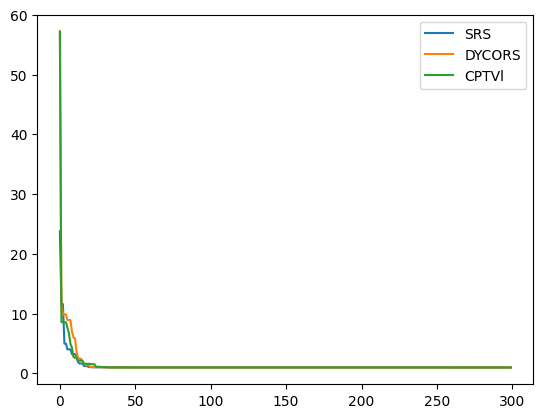

Best value for SRS: 1.000111248132108
Best value for DYCORS: 1.0001009809275536
Best value for CPTVl: 1.000000214104699


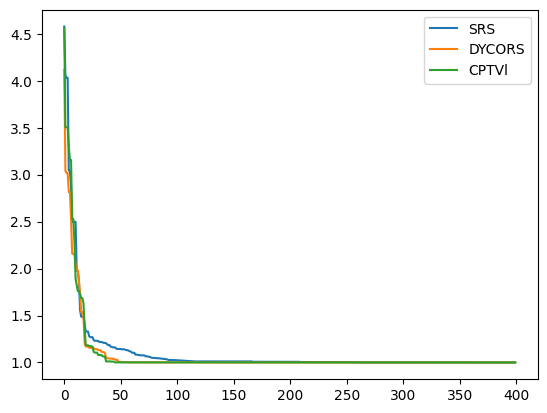

Best value for SRS: 1.0001587233332578
Best value for DYCORS: 1.0000382688606382
Best value for CPTVl: 1.0409653236024166


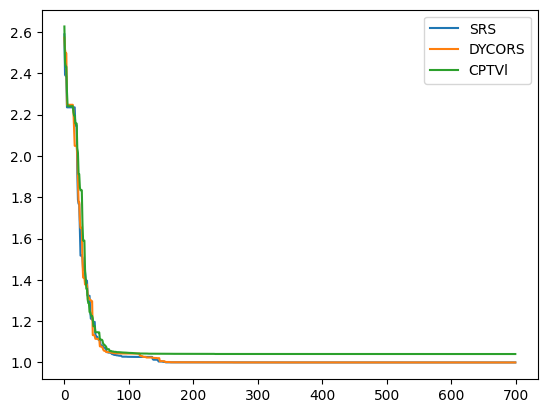

Best value for SRS: 4.950964943738135
Best value for DYCORS: 1.0019205032297964
Best value for CPTVl: 5.3110444400522026


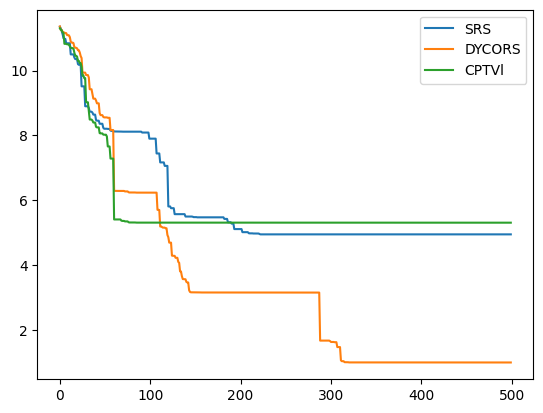

Best value for SRS: 2.8254839012541244
Best value for DYCORS: 1.0315537458431305
Best value for CPTVl: 1.0000000000000349


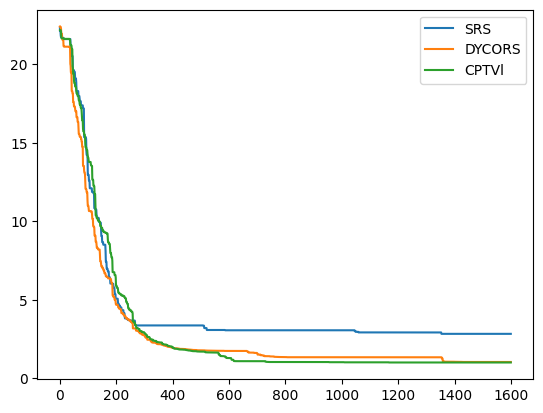

Best value for SRS: 1.0483322273441618
Best value for DYCORS: 2.031999712791828
Best value for CPTVl: 1.0000000008593168


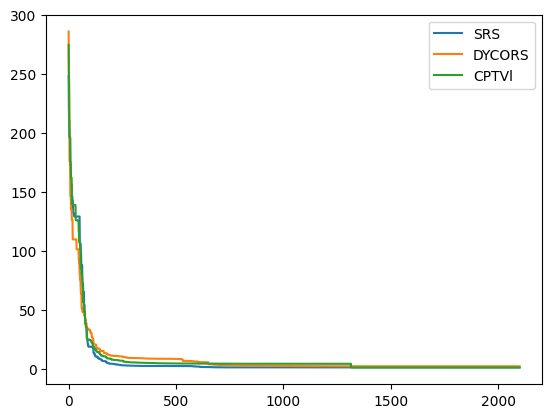

Best value for SRS: 3.358618188711762
Best value for DYCORS: 1.2275422178457218
Best value for CPTVl: 1.0037148236837687


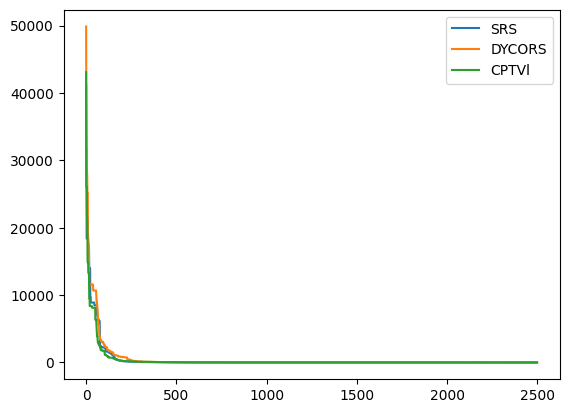

Best value for SRS: 14.30671070187472
Best value for DYCORS: 6.9652715086202575
Best value for CPTVl: 3.949243602435087


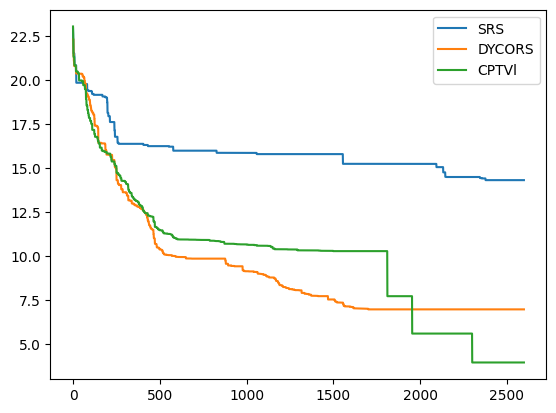

Best value for SRS: 1.0331634050373986
Best value for DYCORS: 1.0012569351273373
Best value for CPTVl: 1.0


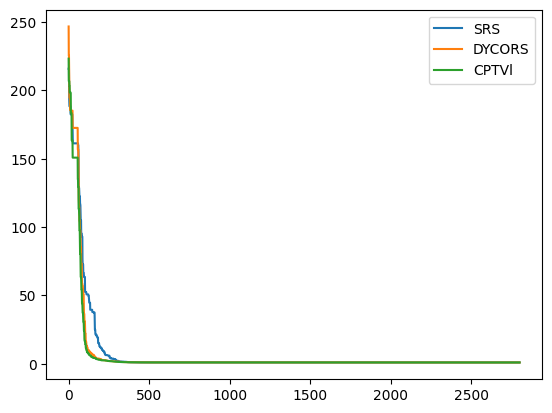

Best value for SRS: 109.39411236309832
Best value for DYCORS: 82.46941774636527
Best value for CPTVl: 1.0


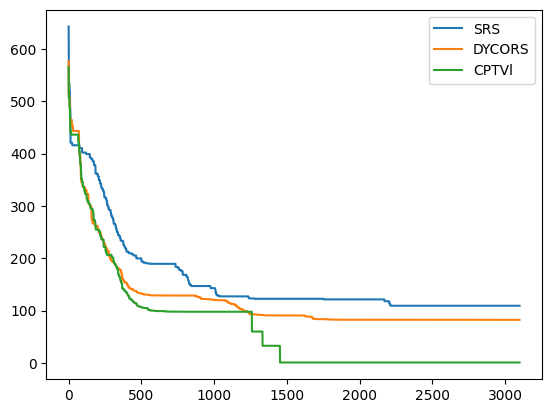

In [23]:
avgBestVals = {}
for a in algorithms:
    avgBestVals[a] = {}
    for rFunc in myRfuncs:
        avgBestVals[a][rFunc] = np.mean(np.array([np.minimum.accumulate(optres[a][rFunc][i].fsamples).tolist() for i in range(nTrials)]), axis=0)

for rFunc in myRfuncs:
    for a in algorithms:
        print("Best value for " + a + ": " + str(avgBestVals[a][rFunc][-1]))
        plt.plot(avgBestVals[a][rFunc], label=a)
    plt.legend()
    plt.show()

In [24]:
rtau = 1e-2
atau = 1e-3
minVal = 1.0

maxIter = {}
for rFunc in myRfuncs:
    maxIter[rFunc] = 100 * (myNargs[rFunc]+1)

lpa = {}
for a in algorithms:
    lpa[a] = {}
    for rFunc in myRfuncs:
        count = 0
        while count < len(avgBestVals[a][rFunc]):
            if avgBestVals[a][rFunc][count] - minVal <= rtau * abs(minVal):
                break
            else:
                count += 1
        lpa[a][rFunc] = count+1

minlpa = {}
for rFunc in myRfuncs:
    minlpa[rFunc] = np.min([lpa[a][rFunc] for a in algorithms])

rpa = {}
for a in algorithms:
    rpa[a] = {}
    for rFunc in myRfuncs:
        if lpa[a][rFunc] <= maxIter[rFunc]:
            rpa[a][rFunc] = lpa[a][rFunc] / minlpa[rFunc]
        else:
            rpa[a][rFunc] = np.inf

nAlpha = 100
alpha = np.linspace(1.0,4.0,nAlpha)
rho = {}
for a in algorithms:
    rho[a] = np.zeros(nAlpha)
    for k in range(len(alpha)):
        count = 0
        for rFunc in myRfuncs:
            if rpa[a][rFunc] <= alpha[k]:
                count += 1
        rho[a][k] = count / len(myRfuncs)

maxKappa = 100
delta = {}
for a in algorithms:
    delta[a] = np.zeros(maxKappa+1)
    for k in range(1,maxKappa+1):
        count = 0
        for rFunc in myRfuncs:
            if lpa[a][rFunc]/(myNargs[rFunc]+1) <= k:
                count += 1
        delta[a][k] = count / len(myRfuncs)

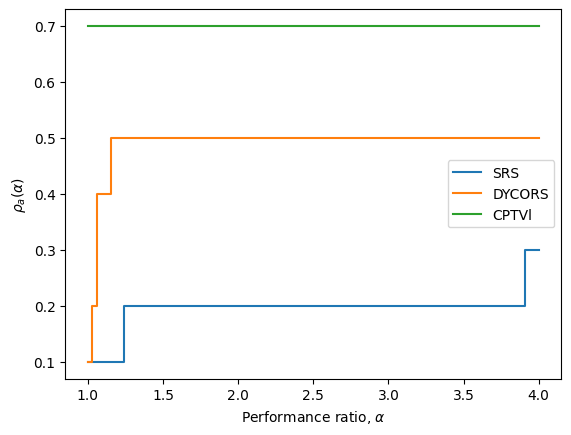

In [25]:
for a in algorithms:
    plt.step(alpha, rho[a], where='post', label=a)
plt.xlabel(r'Performance ratio, $\alpha$')
plt.ylabel(r'$\rho_a(\alpha)$')
plt.legend()
plt.show()

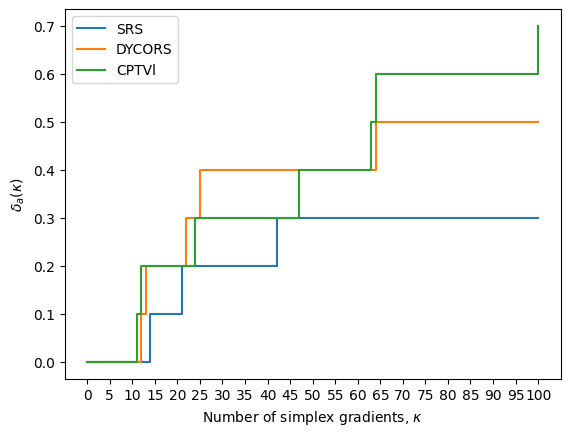

In [26]:
for a in algorithms:
    plt.step(np.arange(0,maxKappa+1), delta[a], where='post', label=a)
plt.xlabel(r'Number of simplex gradients, $\kappa$')
plt.xticks(range(0,101,5))
plt.ylabel(r'$\delta_a(\kappa)$')
plt.legend()
plt.show()

In [27]:
# avgBestVals["SRS"]["ackley"]
lpa["SRS"]["ackley"]/(myNargs["ackley"]+1)

100.0625